## Objective:
To predict the number of dengue cases by city, year, week

In [8]:
#Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [9]:
#Import the datasets
X_train_data = pd.read_csv('dengue_features_train.csv', infer_datetime_format=True, parse_dates=['week_start_date'])
X_test_data = pd.read_csv('dengue_features_test.csv', infer_datetime_format=True, parse_dates=['week_start_date'])
y_train_data = pd.read_csv('dengue_labels_train.csv')

## Exploratory Analysis

### Understanding the datasets

In [10]:
X_train_data.shape, y_train_data.shape, X_test_data.shape

((1456, 24), (1456, 4), (416, 24))

In [11]:
X_train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [12]:
#Combining the training label and predictors
train_data = pd.merge(left=X_train_data , right=y_train_data, left_on=['city', 'year', 'weekofyear'],
                     right_on=['city', 'year', 'weekofyear'],)

In [71]:
train_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [72]:
train_data.columns

corr_list = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
    'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
    'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
    'station_min_temp_c', 'station_precip_mm', 'total_cases'
]

In [101]:
#Split the datasets based on the cities
sj_train_data = train_data[train_data['city']=='sj']
iq_train_data = train_data[train_data['city']=='iq']

sj_test_data = X_test_data[X_test_data['city']=='sj']
iq_test_data = X_test_data[X_test_data['city']=='iq']


In [32]:
train_data.shape, sj_train_data.shape, iq_train_data.shape

((1456, 25), (936, 25), (520, 25))

In [33]:
#Missing data stats
sj_train_data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [34]:
iq_train_data.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

#### The train  dataset
* There are 21 numerical features that can be considered across temperature, precipitation, vegetation index etc
* Scaling and normalization: Its clear from the dataset that the features need to scaled due to the different units like mm, C and K
* How do the cities sj and iq differ?
*  **Missing data**: Need to deal with imputing the missing values esp for vegetation index

#### Correlation Analysis

In [73]:
sj_corr = sj_train_data[corr_list].corr()
iq_corr = iq_train_data[corr_list].corr()

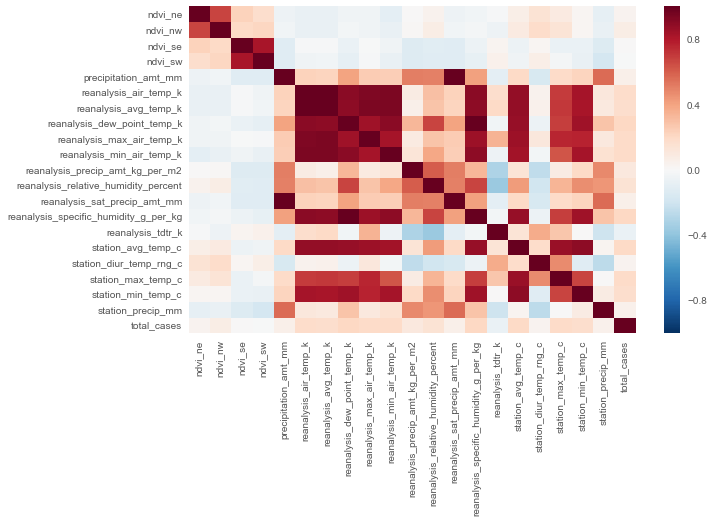

In [75]:
plt.figure(figsize = (10,6))
sns.heatmap(sj_corr)

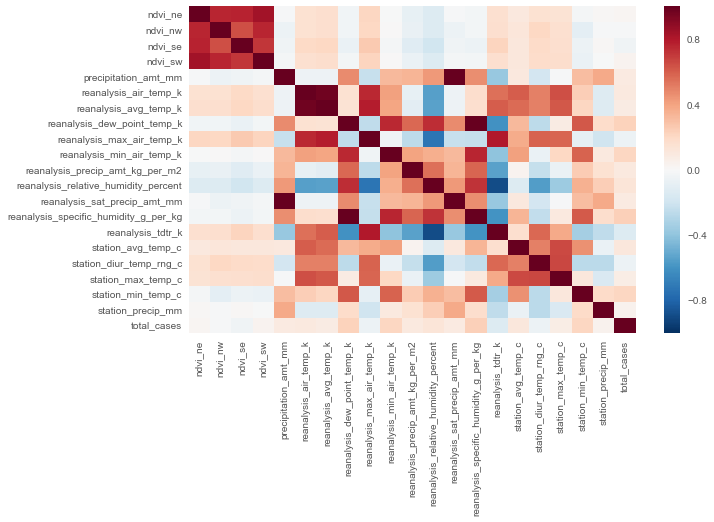

In [76]:
plt.figure(figsize = (10,6))
sns.heatmap(iq_corr)

In [77]:
#Function to get list of most correlated features
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [78]:
# Most highly correlated
#San Jose
mosthighlycorrelated(sj_train_data,20)

,FirstVariable,SecondVariable,Correlation
0,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
1,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.998532
2,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.997495
3,reanalysis_air_temp_k,reanalysis_min_air_temp_k,0.942254
4,reanalysis_avg_temp_k,reanalysis_min_air_temp_k,0.939120
5,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,0.938952
6,reanalysis_air_temp_k,reanalysis_max_air_temp_k,0.935089
7,reanalysis_air_temp_k,reanalysis_specific_humidity_g_per_kg,0.904819
8,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,0.903287
9,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,0.898814


In [79]:
#Iquanis
mosthighlycorrelated(iq_train_data,20)

,FirstVariable,SecondVariable,Correlation
0,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
1,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.997775
2,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.973319
3,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,-0.896491
4,ndvi_ne,ndvi_sw,0.842784
5,reanalysis_max_air_temp_k,reanalysis_tdtr_k,0.799293
6,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,0.783955
7,ndvi_ne,ndvi_se,0.767745
8,ndvi_nw,ndvi_sw,0.764829
9,ndvi_ne,ndvi_nw,0.764407


In [83]:
corr_list

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

In [106]:
# List of Predictors to be used for modelling
# Variables removed
# 1. reanalysis_sat_precip_amt_mm
# 2. reanalysis_dew_point_temp_k

predictors = [
    'ndvi_ne',
    'ndvi_nw',
    'ndvi_se',
    'ndvi_sw',
    'precipitation_amt_mm',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_tdtr_k',
    'station_avg_temp_c',
    'station_diur_temp_rng_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'station_precip_mm',
]

#### Most highly correlated predictos with total_cases

* Total cases has a very low level of correlation with the potential predictors.
* Will try to take lagged values

In [80]:
# SJ
sj = sj_corr.iloc[-1][:-1]
sj.sort_values()

reanalysis_tdtr_k                       -0.067600
ndvi_sw                                 -0.000333
ndvi_se                                  0.001113
station_diur_temp_rng_c                  0.034630
ndvi_ne                                  0.037639
station_precip_mm                        0.051759
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
ndvi_nw                                  0.075307
reanalysis_precip_amt_kg_per_m2          0.107457
reanalysis_relative_humidity_percent     0.144045
reanalysis_avg_temp_k                    0.175267
station_min_temp_c                       0.177012
reanalysis_air_temp_k                    0.181917
reanalysis_min_air_temp_k                0.187943
station_max_temp_c                       0.189901
reanalysis_max_air_temp_k                0.194532
station_avg_temp_c                       0.196617
reanalysis_dew_point_temp_k              0.203774
reanalysis_specific_humidity_g_per_kg    0.207947


In [81]:
# SJ
iq = iq_corr.iloc[-1][:-1]
iq.sort_values()

reanalysis_tdtr_k                       -0.134425
station_diur_temp_rng_c                 -0.058230
reanalysis_max_air_temp_k               -0.056474
ndvi_se                                 -0.041067
ndvi_nw                                 -0.009586
ndvi_ne                                  0.020215
ndvi_sw                                  0.032999
station_precip_mm                        0.042976
station_max_temp_c                       0.075279
reanalysis_avg_temp_k                    0.079872
reanalysis_sat_precip_amt_mm             0.090171
precipitation_amt_mm                     0.090171
reanalysis_air_temp_k                    0.097098
reanalysis_precip_amt_kg_per_m2          0.101171
station_avg_temp_c                       0.113070
reanalysis_relative_humidity_percent     0.130083
station_min_temp_c                       0.211702
reanalysis_min_air_temp_k                0.214514
reanalysis_dew_point_temp_k              0.230401
reanalysis_specific_humidity_g_per_kg    0.236476


### Variables Analysis

* **City**: 
    * sj has 64.3% and iq- 35.7% of the total records
* **Vegtation Index (NDVI)**:
    * range from -0.5 to 0.5

#Creating a pandas profile
import pandas_profiling
train_data_profile = pandas_profiling.ProfileReport(train_data)
train_data_profile.to_file('train_profile.html')

### Dengue Cases across both cities

#### Distribution of the Target: Total Cases
* From the DrivenData blog, it seems like both these are distributions are called **"Negative Binomial Distributions"**

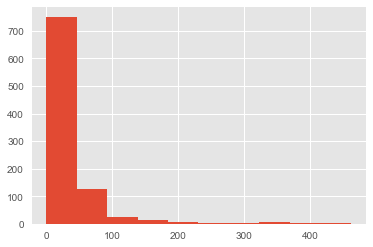

In [53]:
sj_train_data['total_cases'].hist()

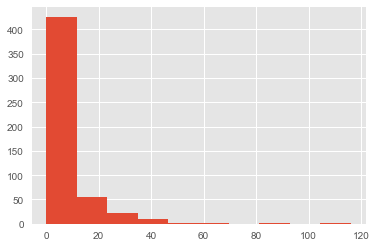

In [54]:
iq_train_data['total_cases'].hist()

#### Let's take a look at the overall trend

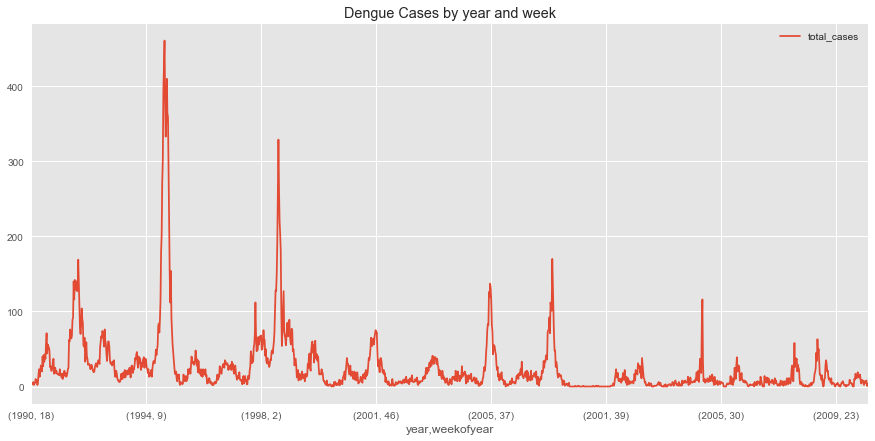

In [27]:
train_data.plot(kind='line',  x=['year', 'weekofyear'], y='total_cases' ,
                figsize=[15,7],title='Dengue Cases by year and week')

#### Let's take a closer look at the city data
* There is more historical data for SJ than Iq
* SJ and Iq must be treated independently for modelling
* **Non-parametric methods** look to work best as there is no significant correlation between total cases & predictors in the plots below

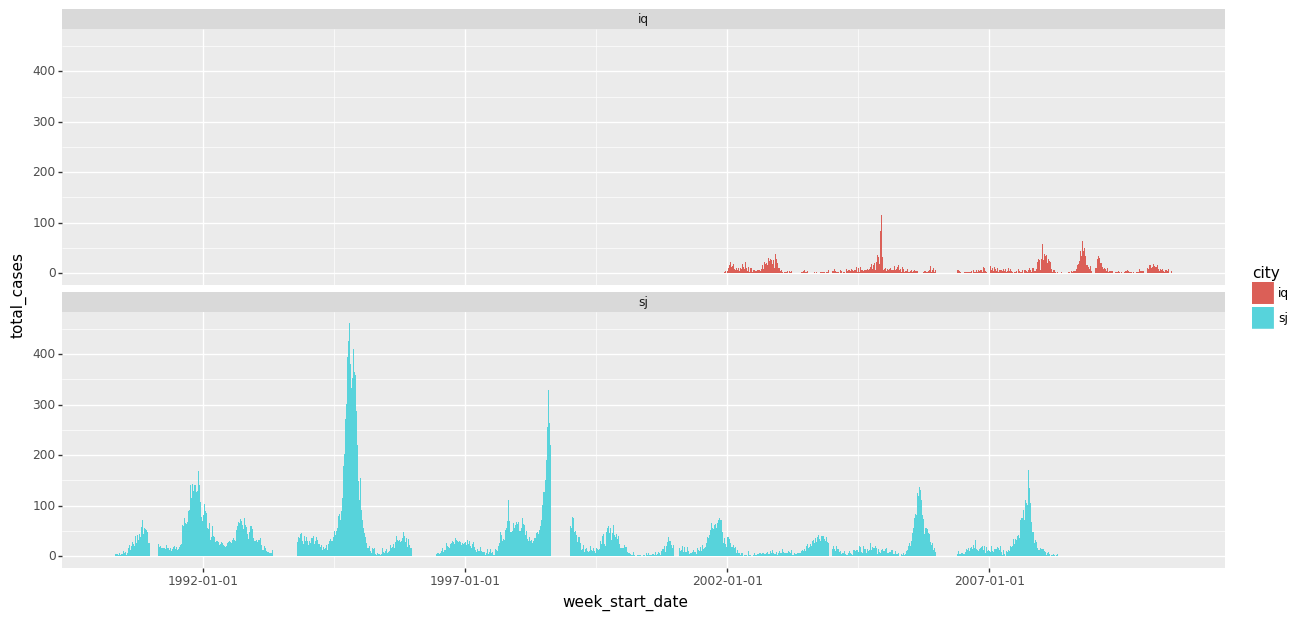

<ggplot: (155545480659)>

In [28]:
(ggplot(train_data.assign(c=train_data['city'])) + aes(x= 'week_start_date', y='total_cases', fill='city')
 + geom_col() + facet_wrap(' ~ c', nrow=2) + theme(figure_size=(15,7)))

### Total cases vs all predictors for city= sj

D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 191 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


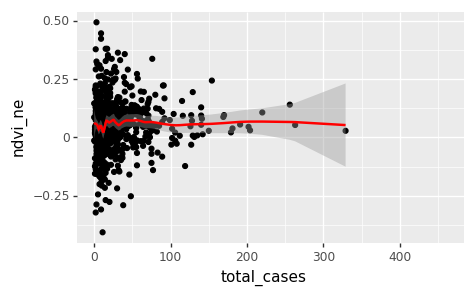

<ggplot: (-9223371881308853048)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 49 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


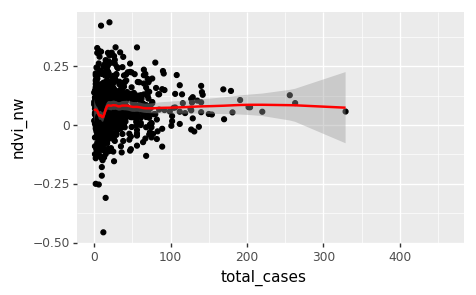

<ggplot: (-9223371881308194037)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 19 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


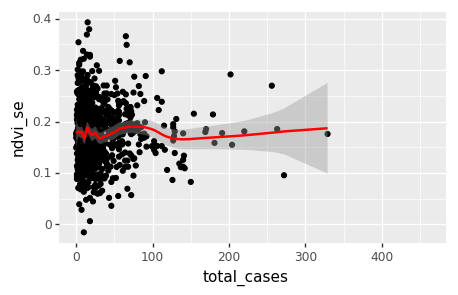

<ggplot: (155545921288)>


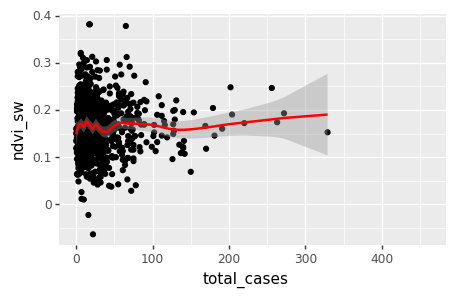

<ggplot: (-9223371881304927807)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 9 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


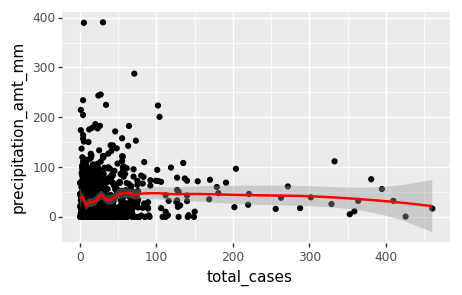

<ggplot: (-9223371881304692003)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 6 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


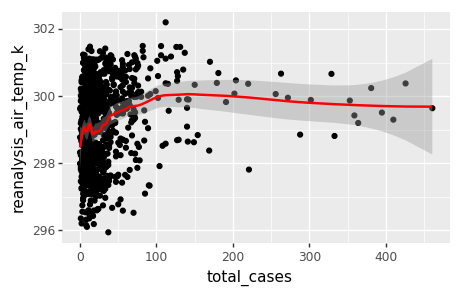

<ggplot: (-9223371881304518589)>


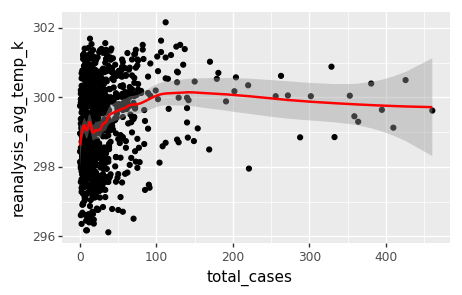

<ggplot: (155551553428)>


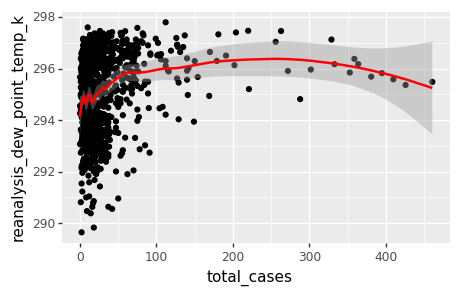

<ggplot: (155551562872)>


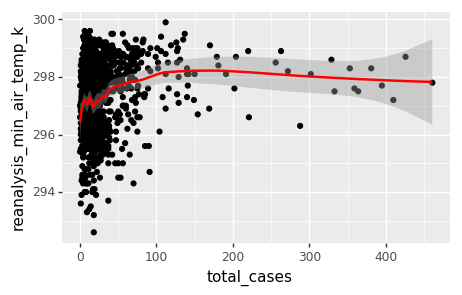

<ggplot: (-9223371881308766071)>


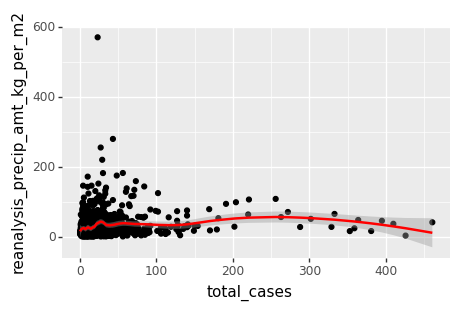

<ggplot: (-9223371881304929532)>


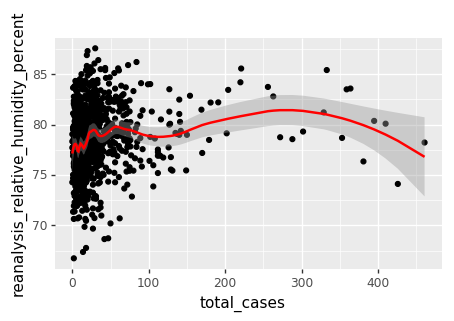

<ggplot: (155550168468)>


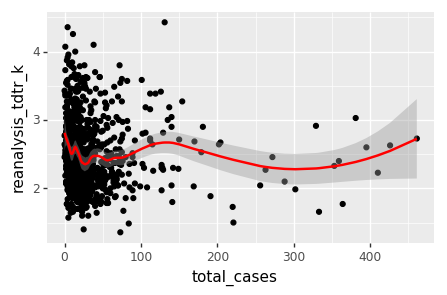

<ggplot: (155550198662)>


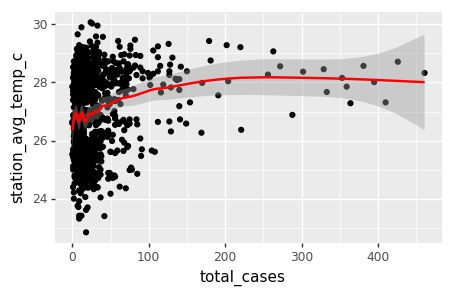

<ggplot: (155550307883)>


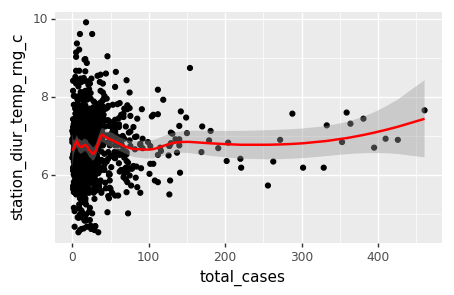

<ggplot: (155546589462)>


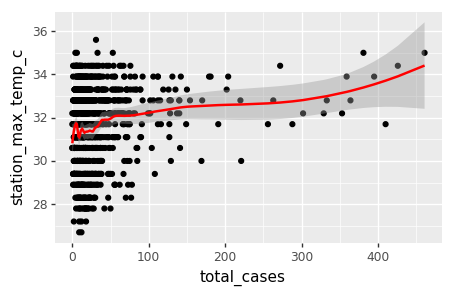

<ggplot: (155551647075)>


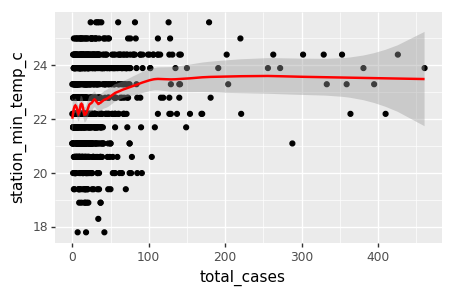

<ggplot: (-9223371881304789735)>


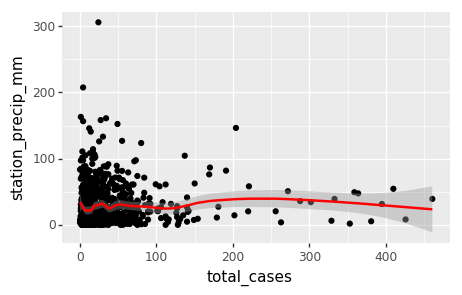

<ggplot: (-9223371881308339049)>


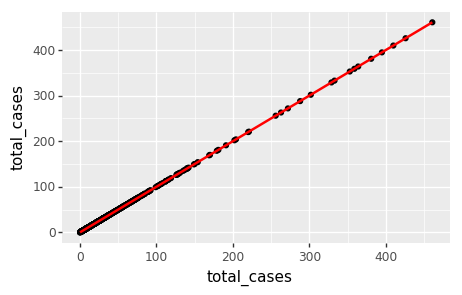

<ggplot: (-9223371881302974306)>


In [55]:
for i in predictors:
    print(ggplot(data=sj_train_data)+ aes(x='total_cases', y=i)+geom_point()
          + stat_smooth(colour='red', span = 0.3, method='loess') + theme(figure_size=(5,3)))

### Total Cases vs all predictors for city='iq'

D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


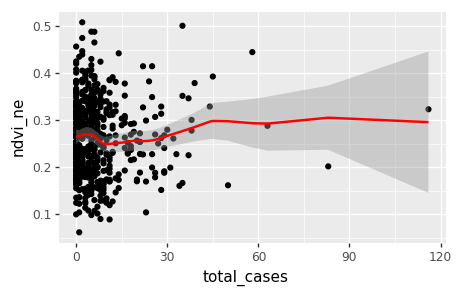

<ggplot: (-9223371881304352757)>


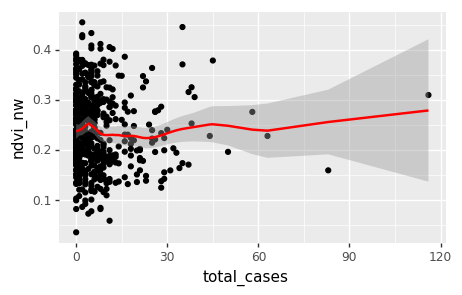

<ggplot: (-9223371881304405700)>


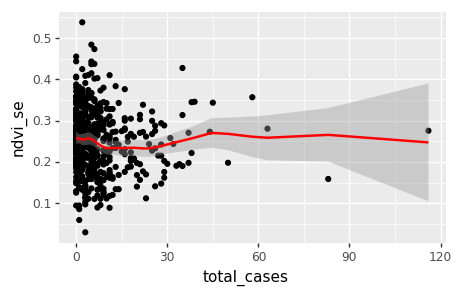

<ggplot: (155550425285)>


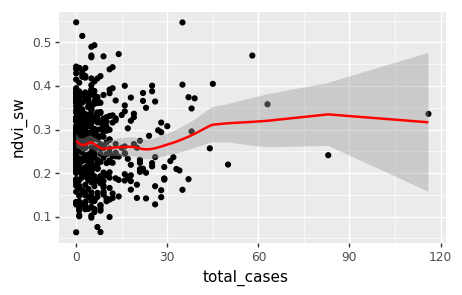

<ggplot: (-9223371881304886065)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


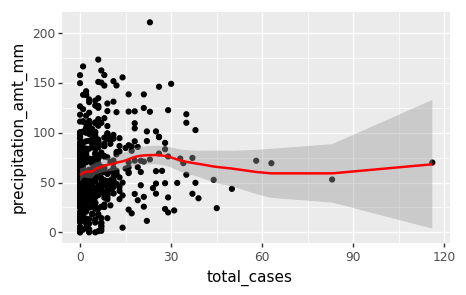

<ggplot: (155546640062)>


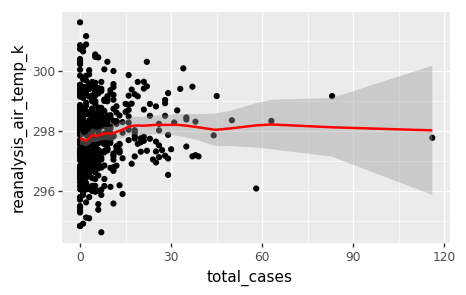

<ggplot: (-9223371881308599520)>


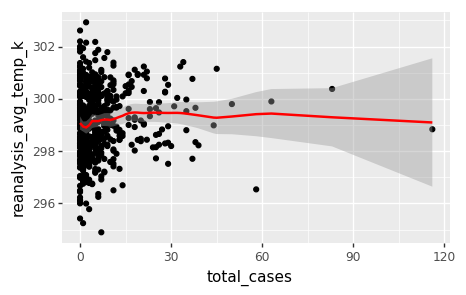

<ggplot: (155550366454)>


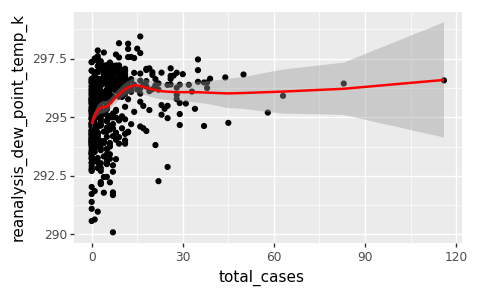

<ggplot: (-9223371881303260598)>


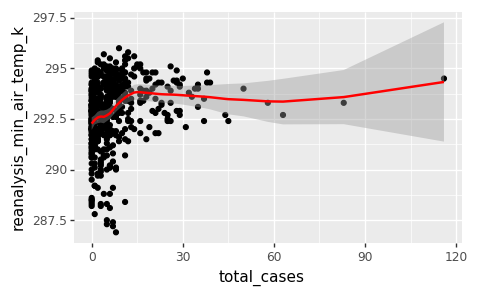

<ggplot: (155551582812)>


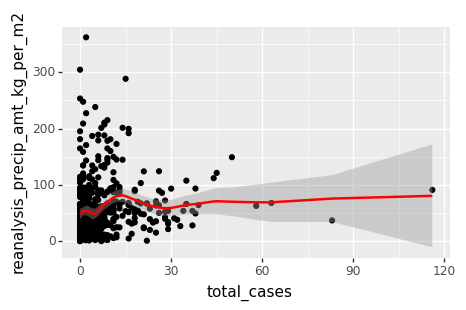

<ggplot: (-9223371881303139128)>


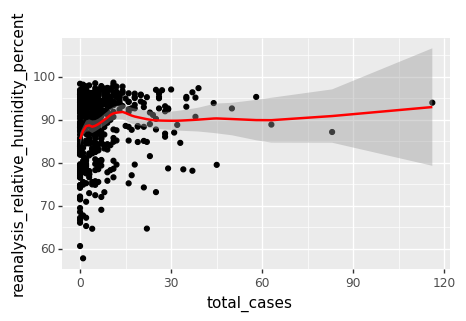

<ggplot: (-9223371881303081675)>


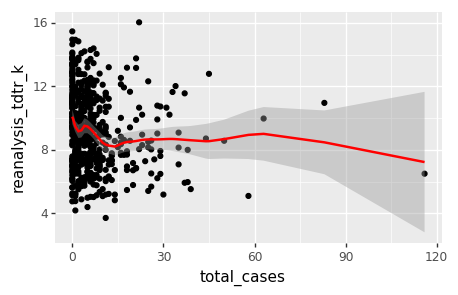

<ggplot: (-9223371881303073255)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 37 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


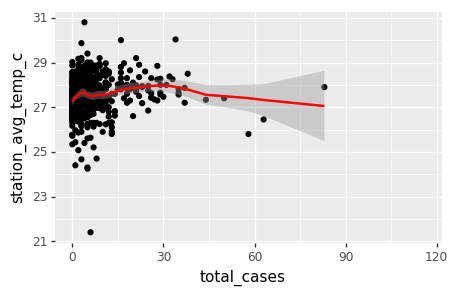

<ggplot: (-9223371881303175701)>


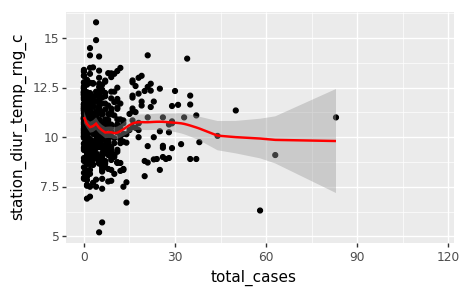

<ggplot: (-9223371881304322514)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 14 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


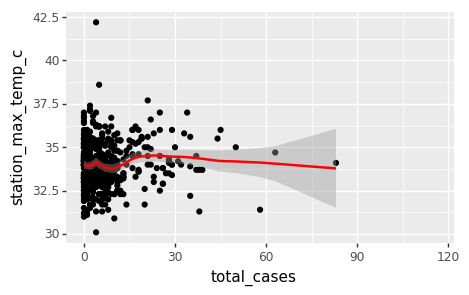

<ggplot: (-9223371881304405651)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 8 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


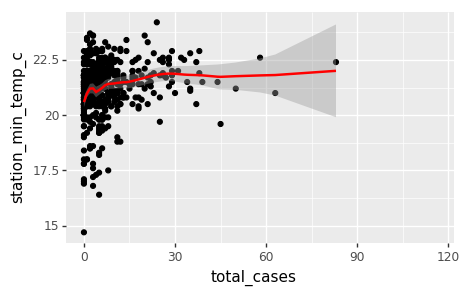

<ggplot: (155549802195)>


D:\Anaconda3\lib\site-packages\plotnine\layer.py:458: UserWarning: geom_point : Removed 16 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


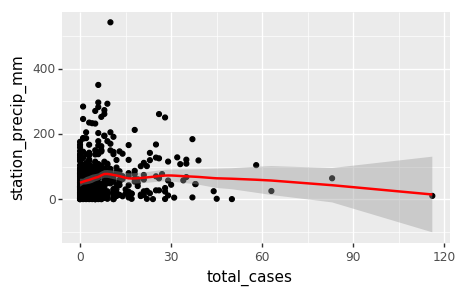

<ggplot: (-9223371881304635644)>


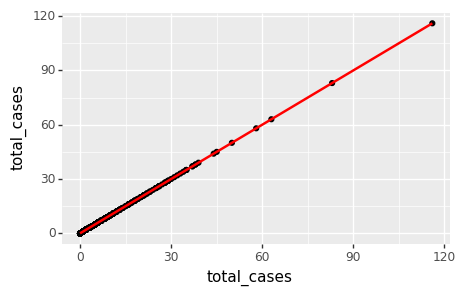

<ggplot: (-9223371881304748663)>


In [45]:
for i in predictors:
    print(ggplot(data=iq_train_data)+ aes(x='total_cases', y=i)+geom_point()
          +stat_smooth(colour='red', method='loess') + theme(figure_size=(5,3)))